## **Neural network model to classify images of clothing, such as sneakers and t-shirts**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


### **Import the Fashion MNIST dataset**
Fashion MNIST which contains **70,000 grayscale images in 10 categories**.
The images show individual items of clothing at **low resolution (28 x 28 pixels)**, as seen here:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
import pandas as pd

train_df = pd.DataFrame({
    'Label': train_labels,
    'Image Shape': [img.shape for img in train_images]
})

train_df.head(10)

,Label,Image Shape
0,9,"(28, 28)"
1,0,"(28, 28)"
2,0,"(28, 28)"
3,3,"(28, 28)"
4,0,"(28, 28)"
5,2,"(28, 28)"
6,7,"(28, 28)"
7,2,"(28, 28)"
8,5,"(28, 28)"
9,5,"(28, 28)"


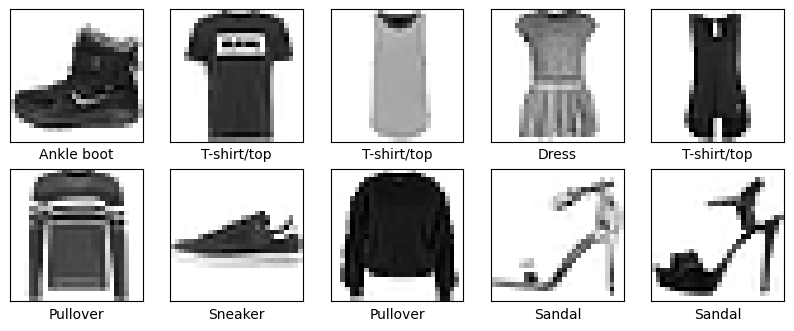

In [6]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Explore the data**
Let’s look at the **format of the dataset before training the model**. 
The following shows that there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape
# 60000 images, 28*28

(60000, 28, 28)

In [9]:
# labels
len(train_labels)

60000

In [10]:
# Each label is an integer between 0 and 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape
# 10000 and 28*28

(10000, 28, 28)

In [12]:
# labels
len(train_labels)

60000

## **Preprocess the data**
The **data must be preprocessed before training the network**. If you look at the **first image in the training set**, you will see that **the pixel values ​​fall in the range of 0 to 255**:

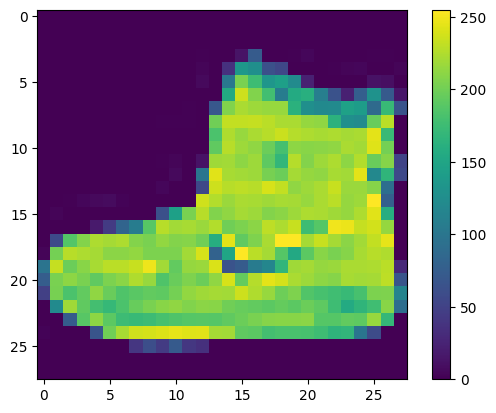

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### **Scale these values ​​to a range of 0 to 1 before feeding them to the neural network model**. To do this, **divide the values ​​by 255**. It is **important that the training set and the test set are preprocessed in the same way**:

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### **To verify that the data is in the correct format** and that you are ready to build and train the network, we **display the first 9 images from the training set** and show the class name under each image.

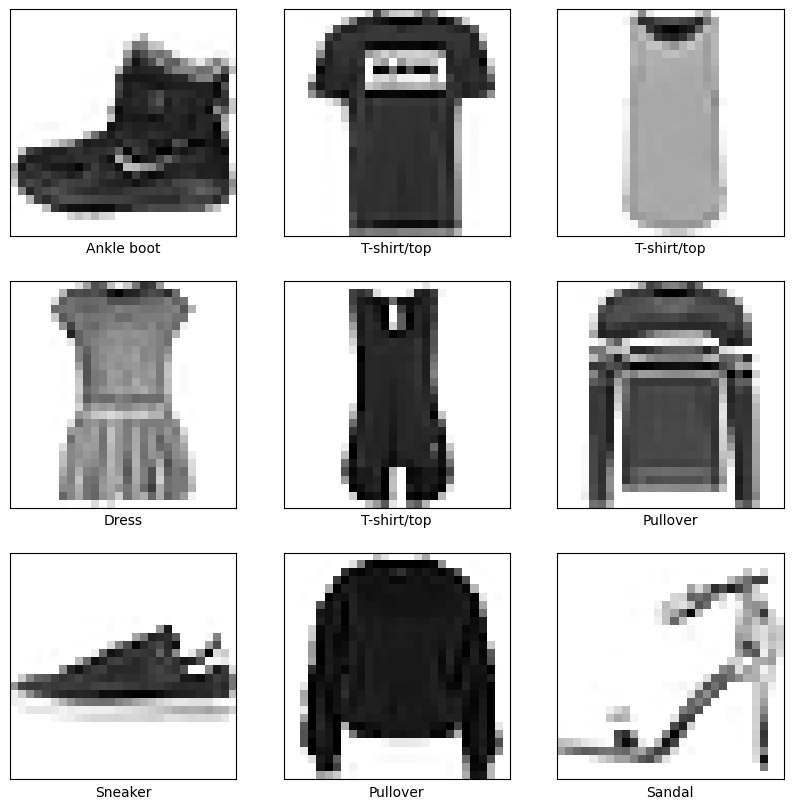

In [20]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **Build the model**
**Building the neural network involves setting up the model layers**, then compiling the model.

- **Prepare the layers**
The **basic building block of a neural network is the layer**. 
**Layers extract representations from the data fed into them**. Hopefully, these representations are meaningful to the problem at hand.

Most **deep learning** is about **chaining simple layers together**. Most layers, such as **tf.keras.layers.Dense** , have parameters that are learned during training.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10)
])

### **The first layer of this network**, **tf.keras.layers.Flatten** , transforms the image format **from a two-dimensional matrix (of 28 x 28 pixels)** to a **one-dimensional matrix (of 28 * 28 = 784 pixels)**. Think of this layer as unstacking rows of pixels in the image and aligning them. This layer has no parameters to learn; it just reformats the data.

### **After the pixels are flattened**, the **network consists of a sequence of two tf.keras.layers.Dense layers**. These are **densely connected or fully connected neural layers**. The first Dense layer has **128 nodes (or neurons)**. **The second (and final) layer returns a logit array with length 10**. Each node contains a score indicating that the current image belongs to one of 10 classes.

In [ ]:
model.compile()

### **Compile the model**
**Before the model is ready to train**, there are a few more settings that are needed. These are added during the model build phase:

* **Loss function**: This **measures the accuracy of the model during training**. You want to **minimize this function** to “steer” the model in the right direction.
* **Optimizer**: This is **how the model is updated based on the data** it sees and its **loss function**.
* **Metrics**: These are used to **monitor the training and testing phases**. The following example uses precision, the fraction of images that are correctly classified.

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

[Train the model](https://www.tensorflow.org/tutorials/keras/classification?hl=it#explore_the_data)